In [ ]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
    }
</style>

In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np

In [2]:
import os
os.chdir('C://Users//2918261//Dropbox//Corner Office Interviews')
os.getcwd()
## C://Users//2918261//Courses//Oslo Summer School//notebooks//Interviews//Text 

'C:\\Users\\2918261\\Dropbox\\Corner Office Interviews'

In [3]:
pd.set_option('display.max_colwidth', 120)

In [4]:
reg = pd.read_excel('C://Users//2918261//Dropbox//Corner Office Interviews//Robustness//Fixed Effects//Coef.xlsx')

In [5]:
All = pd.read_excel('C://Users//2918261//Dropbox//Corner Office Interviews//AllFrames.xlsx')

## Only keep the name once 

In [6]:
All = All.drop_duplicates(subset = 'Name ', keep = 'first')

In [ ]:
## People to drop for Masculinity - stata
# 516  WaltBettinger
# 519  WendyLea
# 521  WilliamDGreen 
# 522  YorgenEdholm
# 523  YuchunLee

## NYT_522 - LIWC: 0, 514, 517, 518, 520, 521

## LIWC.loc[[0, 514, 517, 518, 520, 521]]

## Drop the ommitted rows

In [7]:
All = All.sort_values('Name ').copy()

In [8]:
All = All.reset_index(drop = True).copy()

In [9]:
All.loc[[0, 515, 518, 520, 521, 522]]

,Name,AllPunc,Analytic,Apostro,Authentic,Clout,Colon,Comma,Current Age,Dash,...,space,swear,tentat,they,time,verb,we,work,you,Source_Dic
0,AaronBell,20.82,53.71,3.02,77.67,85.97,0.11,5.18,42,0.54,...,8.31,0.0,4.53,2.70,5.72,19.09,0.43,6.26,2.70,NYT
515,WaltBettinger,18.69,51.66,2.77,59.09,69.25,0.10,4.93,58,0.31,...,6.57,0.0,3.29,2.46,3.59,18.17,0.41,6.26,2.36,NYT
518,WendyLea,18.49,57.54,3.14,67.86,68.27,0.11,6.92,65,0.43,...,8.54,0.0,2.49,0.97,4.32,15.57,2.92,4.32,0.97,AInterviews
520,WilliamDGreen,10.83,73.99,0.00,38.02,73.37,0.00,5.79,66,0.53,...,7.22,0.0,3.68,2.41,4.21,13.31,1.80,2.48,1.73,AInterviews
521,YorgenEdholm,18.74,35.73,2.94,62.22,53.14,0.00,4.81,64,0.79,...,6.28,0.0,5.20,2.45,4.51,20.61,0.29,4.81,1.28,NYT
522,YuchunLee,17.54,82.00,1.21,48.55,74.15,0.13,6.61,54,1.35,...,7.29,0.0,1.48,0.81,4.99,11.61,2.56,9.45,0.27,AInterviews


In [10]:
All = All.drop([0, 515, 518, 520, 521, 522])

In [11]:
Gender = All[['Name ', 'Female']]

In [12]:
Gender = Gender.sort_values('Name ').copy()

In [13]:
Gender = Gender.reset_index(drop = True)

## Drop irrelevant rows, clean names and drop omitted rows

In [14]:
reg = reg.dropna()

In [15]:
reg = reg[6:-8].copy()

In [16]:
reg['Unnamed: 0'] = reg['Unnamed: 0'].replace('Name = \d+,',' ',regex=True).astype(str)

In [17]:
reg = reg.rename(columns = {'Unnamed: 0': 'Name', '(1)': 'Agentic', '(2)': 'Communal'}).copy()

In [18]:
reg = reg[reg['Name'].str.contains('omitted') == False].copy()

In [19]:
reg = reg.sort_values('Name').copy()

In [20]:
reg = reg.reset_index(drop = True)

## concat

In [21]:
new = pd.concat([Gender, reg], axis = 1)

In [22]:
new 

,Name,Female,Name,Agentic,Communal
0,AaronLevie,0,AaronLevie,-5.427,-8.196
1,AbbeRaven,1,AbbeRaven,0.967,-1.256
2,AbeAnkumah,0,AbeAnkumah,-6.360,-7.646
3,AdamNash,0,AdamNash,-6.054,5.562
4,AdiTatarko,1,AdiTatarko,0.022,-18.190*
5,AileenLee,1,AileenLee,-8.830,0.100
6,AlanDabbiere,0,AlanDabbiere,-5.246**,10.486***
7,AlanRMulally,0,AlanRMulally,5.795,-9.144
8,AlanTrefler,0,AlanTrefler,8.420,-7.171
9,AlastairMitchell,0,AlastairMitchell,-0.138,-10.832


## Cleaning Numbers

In [23]:
new = new.drop(columns = ['Name '])

In [24]:
new['Agentic_Coef'] = new[['Agentic']].replace('\*','',regex=True).astype(float)

In [25]:
new['Communal_Coef'] = new[['Communal']].replace('\*','',regex=True).astype(float)

## Normalizing 

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
new['Agentic_Coef_N'] = scaler.fit_transform(new[['Agentic_Coef']]).round(2)

In [29]:
new['Communal_Coef_N'] = scaler.fit_transform(new[['Communal_Coef']]).round(2)

In [30]:
new

,Female,Name,Agentic,Communal,Agentic_Coef,Communal_Coef,Agentic_Coef_N,Communal_Coef_N
0,0,AaronLevie,-5.427,-8.196,-5.427,-8.196,-0.82,-0.54
1,1,AbbeRaven,0.967,-1.256,0.967,-1.256,0.30,0.15
2,0,AbeAnkumah,-6.360,-7.646,-6.360,-7.646,-0.98,-0.49
3,0,AdamNash,-6.054,5.562,-6.054,5.562,-0.93,0.82
4,1,AdiTatarko,0.022,-18.190*,0.022,-18.190,0.13,-1.53
5,1,AileenLee,-8.830,0.100,-8.830,0.100,-1.41,0.28
6,0,AlanDabbiere,-5.246**,10.486***,-5.246,10.486,-0.79,1.31
7,0,AlanRMulally,5.795,-9.144,5.795,-9.144,1.14,-0.63
8,0,AlanTrefler,8.420,-7.171,8.420,-7.171,1.60,-0.44
9,0,AlastairMitchell,-0.138,-10.832,-0.138,-10.832,0.10,-0.80


In [31]:
new.describe().round(4)

,Female,Agentic_Coef,Communal_Coef,Agentic_Coef_N,Communal_Coef_N
count,517.0000,517.0000,517.0000,517.0000,517.0000
mean,0.3926,-0.7389,-2.7384,0.0001,0.0001
std,0.4888,5.7352,10.1011,1.0011,1.0011
min,0.0000,-16.9540,-36.1280,-2.8300,-3.3100
25%,0.0000,-4.8590,-8.6340,-0.7200,-0.5800
50%,0.0000,-1.0200,-1.3340,-0.0500,0.1400
75%,1.0000,3.2620,4.4070,0.7000,0.7100
max,1.0000,16.5410,20.7570,3.0200,2.3300


In [51]:
new = new.rename(columns = {'Agentic_Coef_N': 'Agentic Model Coefficients Normalized', 
                      'Communal_Coef_N': 'Communal Model Coefficients Normalized'}).copy()

C:\Users\2918261\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


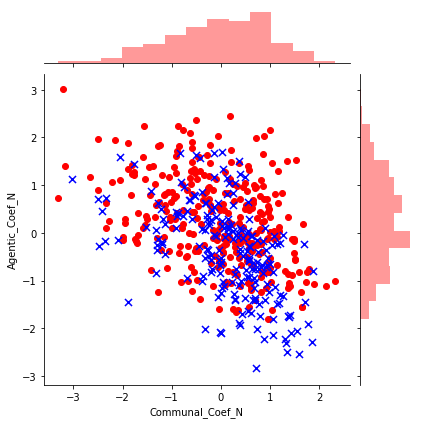

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
Female = new[new['Female'] == 1]
Male = new[new['Female'] == 0]
graph = sns.jointplot(x=Male['Communal_Coef_N'], y=Male['Agentic_Coef_N'], color='r')

graph.x = Female['Communal_Coef_N']
graph.y = Female['Agentic_Coef_N']
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)

In [32]:
new['Communal_Coef_N'].mean()

0.00013539651837525285

In [35]:
normalized = new[['Communal_Coef_N', 'Agentic_Coef_N', 'Female']]

In [44]:
import plotly.graph_objects as go
import plotly.express as px

In [34]:
new['Gender'] = new['Female'].map({0:'M', 1:'F'})

In [52]:
px.scatter(new, x = 'Communal Model Coefficients Normalized', y = 'Agentic Model Coefficients Normalized', color = 'Gender', marginal_y = 'box', height = 600, 
           marginal_x = 'box')

In [38]:
Female = new[new['Female']== 1]

In [39]:
Female_Mean = Female['Communal_Coef_N'].mean()

In [40]:
Male = new[new['Female']== 0]

In [41]:
Male_Mean = Male['Communal_Coef_N'].mean()

In [42]:
from scipy import stats

In [43]:
stats.ttest_ind(Male['Communal_Coef_N'], Female['Communal_Coef_N'], equal_var = True)

Ttest_indResult(statistic=-2.0277308846597717, pvalue=0.043102073130365126)

In [44]:
stats.ttest_ind(Male['Agentic_Coef_N'], Female['Agentic_Coef_N'], equal_var = True)

Ttest_indResult(statistic=7.397136600480961, pvalue=5.688720980357792e-13)

In [6]:
print("{:f}".format(float("5.688720980357792e-13")))

0.000000


In [45]:
# stats.ttest_ind(Male['Communal_Coef_N'], Female['Communal_Coef_N'], equal_var = False)

Ttest_indResult(statistic=-2.0944298196300584, pvalue=0.03675057884796608)

In [46]:
# stats.ttest_ind(Male['Agentic_Coef_N'], Female['Agentic_Coef_N'], equal_var = False)

Ttest_indResult(statistic=7.352152164766811, pvalue=1.0198650824933857e-12)

In [47]:
print("{:f}".format(float("1.0198650824933857e-12")))

0.000000
